## Real Scalar Gaussian Random Variable

### Probability Density Function (PDF)

The probability density function (PDF) of a real scalar Gaussian (normal) random variable $ \mathbf{x} $ with mean $ \mu $ and variance $ \sigma^2 $ is given by:

$$
f_{\mathbf{x}}(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

where:
- **Mean ( $ \mu $ )**: The central value around which the random variable $ \mathbf{x} $ is distributed.
- **Variance ( $ \sigma^2 $ )**: The measure of the spread or dispersion of the random variable around the mean. The standard deviation $ \sigma $ is the square root of the variance.
- **Exponent Term**: The term $ \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $ describes the bell-shaped curve of the Gaussian distribution. The value decreases exponentially as $ (x-\mu)^2 $ increases, indicating that values further from the mean are less probable.
- **Normalization Factor**: $ \frac{1}{\sqrt{2\pi}\sigma} $ ensures that the total area under the PDF equals 1, a requirement for any probability distribution.

**Notation**

The notation $ \mathbf{x} \sim \mathcal{N}(\mu, \sigma^2) $ indicates that the random variable $ \mathbf{x} $ follows a Gaussian distribution with mean $ \mu $ and variance $ \sigma^2 $. 

Similarly, $ \mathbf{w} \sim \mathcal{N}(0, 1) $ denotes a standard Gaussian (or normal) random variable with mean 0 and variance 1.

### Complementary Cumulative Distribution Function (CCDF)

The complementary cumulative distribution function (CCDF) of the standard Gaussian distribution, denoted as $ Q(a) $, represents the probability that the standard Gaussian random variable $ \mathbf{w} $ exceeds the value $ a $. It is defined as:

$$
Q(a) = P(\mathbf{w} > a) = \int_a^\infty \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{w^2}{2}\right) \, dw
$$

This function $ Q(a) $ is often referred to as the **Q-function**. 

It is derived from the tail probability of the standard Gaussian distribution, which is the integral of the probability density function (PDF) from $ a $ to infinity.

**DISCUSSION.** **Behavior of $ Q(a) $ as $ a $ Increases**:
   - When $ a $ is small (close to 0), $ Q(a) $ is relatively large because the probability that $ \mathbf{w} $ exceeds a small number is not negligible.
   - As $ a $ increases, the area under the curve (from $ a $ to infinity) gets smaller, and so $ Q(a) $ decreases.
   - The rate at which $ Q(a) $ decreases as $ a $ increases is very rapid. Specifically, for large values of $ a $, the Q-function behaves approximately as:

     $$
     Q(a) \approx \frac{1}{a\sqrt{2\pi}} \exp\left(-\frac{a^2}{2}\right)
     $$

     This expression shows that $ Q(a) $ decreases much faster than a simple exponential function as $ a $ increases. The leading factor $ \frac{1}{a\sqrt{2\pi}} $ is relatively small compared to the rapid decay caused by the exponential term $ \exp\left(-\frac{a^2}{2}\right) $.


**Gaussian decay.** When people say "decreases exponentially," they often refer to functions that decrease like $ e^{-ka} $ for some constant $ k > 0 $. However, $ Q(a) $ decreases even faster because it has a $ -a^2 $ in the exponent. This is known as "Gaussian decay," which is faster than exponential decay.


In [1]:
import warnings
warnings.filterwarnings("ignore")

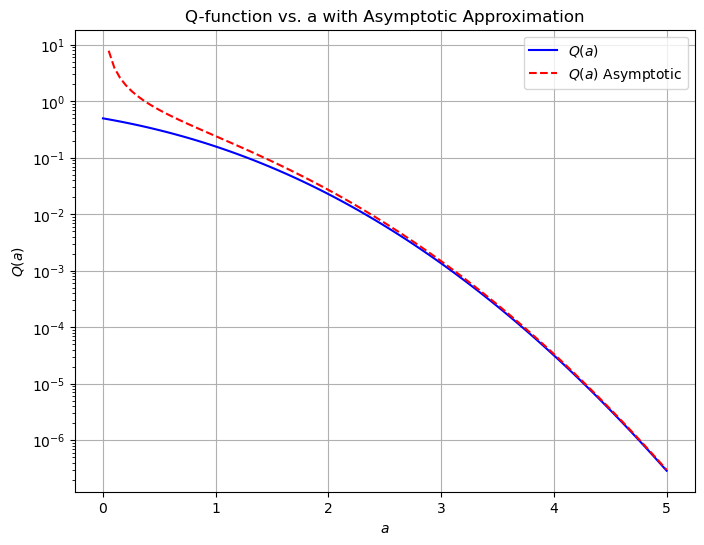

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Define the Q-function using the complementary error function
def Q_function(a):
    return 0.5 * erfc(a / np.sqrt(2))

# Generate a range of "a" values
a_values = np.linspace(0, 5, 100)

# Compute the Q-function for each "a"
Q_values = Q_function(a_values)

# Define the asymptotic approximation of the Q-function for large "a"
def Q_function_asymptotic(a):
    return 1 / (a * np.sqrt(2 * np.pi)) * np.exp(-a**2 / 2)

# Compute the asymptotic approximation for each "a"
Q_asymptotic_values = Q_function_asymptotic(a_values)

# Plot both the Q-function and its asymptotic approximation
plt.figure(figsize=(8, 6))
plt.plot(a_values, Q_values, label=r'$Q(a)$', color='blue')
plt.plot(a_values, Q_asymptotic_values, '--', label=r'$Q(a)$ Asymptotic', color='red')
plt.yscale('log')  # Logarithmic scale to emphasize the rapid decrease
plt.xlabel(r'$a$')
plt.ylabel(r'$Q(a)$')
plt.title('Q-function vs. a with Asymptotic Approximation')
plt.grid(True)
plt.legend()
plt.show()



### Bounds for $ Q(a) $

For large values of $ a $, the function $ Q(a) $ can be approximated by the following inequalities:

$$
\frac{1}{\sqrt{2\pi}a}\left(1 - \frac{1}{a^2}\right)e^{-\frac{a^2}{2}} < Q(a) < e^{-\frac{a^2}{2}}
$$

* **Lower Bound**: The term $ \frac{1}{\sqrt{2\pi}a}\left(1 - \frac{1}{a^2}\right)e^{-\frac{a^2}{2}} $ provides a more precise estimate for large $ a $. It accounts for the $ a^{-1} $ and $ a^{-3} $ terms, refining the exponential decay.
* **Upper Bound**: The simpler bound $ e^{-\frac{a^2}{2}} $ offers a straightforward exponential approximation.

These bounds are useful for estimating probabilities and simplifying calculations involving the tail of the Gaussian distribution, particularly in high-precision contexts such as error rate calculations in communication systems.

### Theoretical CDF in Terms of Error Function

The CDF of a Gaussian (normal) random variable $ \mathbf{x} \sim \mathcal{N}(\mu, \sigma^2) $ can be expressed using the error function (erf).

The error function is defined as:

$$
\text{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-t^2} \, dt
$$

The CDF of a Gaussian random variable $ \mathbf{x} $ is given by:

$$
F_{\mathbf{x}}(x) = P(\mathbf{x} \leq x)
$$

For a Gaussian random variable with mean $ \mu $ and variance $ \sigma^2 $, the CDF can be expressed as:

$$
F_{\mathbf{x}}(x) = \frac{1}{2} \left( 1 + \text{erf} \left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right)
$$

**Insights:**
- **Normalization**: The argument of the error function $ \frac{x - \mu}{\sigma \sqrt{2}} $ standardizes the variable $ x $ to have a mean of 0 and a variance of 1, aligning it with the standard normal distribution.
- **Scaling**: The factor $ \frac{1}{2} $ scales the range of the error function from $[-1, 1]$ to $[0, 1]$, matching the range of the CDF.
- **Translation**: The $ +1 $ inside the parentheses shifts the result to fit the $[0, 1]$ interval required for the CDF.

## Simulation: Empirical CDF and PDF

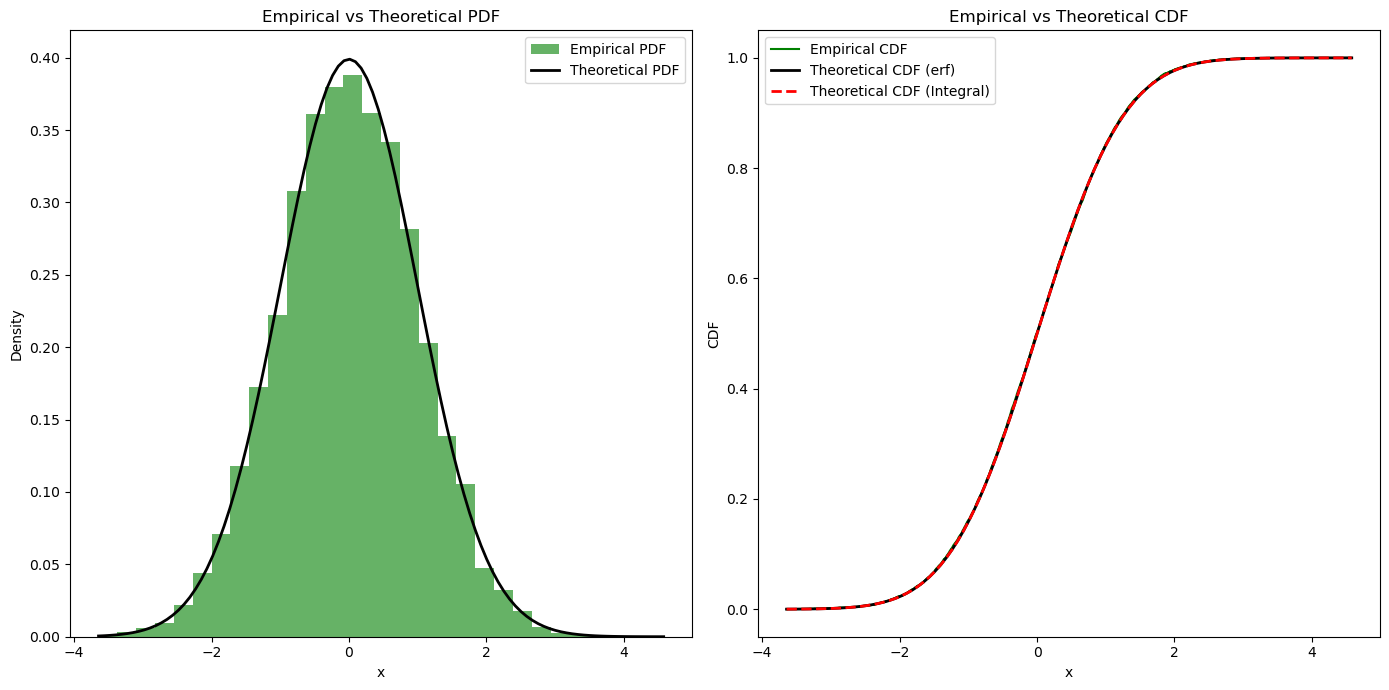

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")

# Parameters for the Gaussian distribution
mu = 0       # Mean
sigma = 1    # Standard deviation
num_samples = 10000  # Number of samples

# Step 1: Simulate the real scalar Gaussian random variable
samples = np.random.normal(mu, sigma, num_samples)

# Function to compute the theoretical PDF
def gaussian_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Function to compute the theoretical CDF using the error function
def gaussian_cdf_erf(x, mu, sigma):
    return 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))

# Function to compute the theoretical CDF using the Q-function integral
def gaussian_cdf_integral(x, mu, sigma):
    Q_a = lambda a: (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * a ** 2)
    cdf_values = []
    for value in x:
        integral, _ = quad(Q_a, value, np.inf)
        cdf_value = 1 - integral
        cdf_values.append(cdf_value)
    return np.array(cdf_values)

# Step 2: Plot the empirical PDF
plt.figure(figsize=(14, 7))

# Histogram for empirical PDF
plt.subplot(1, 2, 1)
count, bins, ignored = plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Empirical PDF')

# Plot the theoretical PDF
x = np.linspace(min(bins), max(bins), 100)
pdf = gaussian_pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth=2, label='Theoretical PDF')
plt.title('Empirical vs Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Step 3: Plot the theoretical CDF and compare with the empirical CDF
# Empirical CDF
empirical_cdf = np.arange(1, num_samples + 1) / num_samples
sorted_samples = np.sort(samples)

plt.subplot(1, 2, 2)
plt.step(sorted_samples, empirical_cdf, label='Empirical CDF', color='g')

# Theoretical CDF using error function
cdf_erf = gaussian_cdf_erf(x, mu, sigma)
plt.plot(x, cdf_erf, 'k', linewidth=2, label='Theoretical CDF (erf)')

# Theoretical CDF using the integral of Q-function
cdf_integral = gaussian_cdf_integral(x, mu, sigma)
plt.plot(x, cdf_integral, 'r--', linewidth=2, label='Theoretical CDF (Integral)')

plt.title('Empirical vs Theoretical CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()
plt.show()


### Discussions on the bounds

The bounds of $ Q(a) $, the complementary CDF of the standard Gaussian distribution, are derived using asymptotic approximations and properties of the Gaussian distribution.


The complementary CDF $ Q(a) $ is defined as:

$$ Q(a) = P(\mathbf{w} > a) = \int_a^\infty \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{w^2}{2}\right) \, dw $$

**Asymptotic Approximation for Large $ a $**

For large values of $ a $, the value of $ Q(a) $ can be approximated by examining the behavior of the integrand $ \exp\left(-\frac{w^2}{2}\right) $. The idea is to find simpler expressions that approximate the integral accurately.

**Using the Tail Probability Approximation**

For large $ a $, the value of the integral $ Q(a) $ is dominated by the values of $ \mathbf{w} $ close to $ a $. Therefore, we can approximate the tail probability by considering the leading terms of the integrand's expansion.

**Applying the Change of Variable Technique**

One common approach is to perform a change of variables to simplify the integration. Let’s use the complementary error function, denoted as $ \text{erfc}(a) $, which is related to $ Q(a) $:

$$ Q(a) = \frac{1}{2} \text{erfc}\left(\frac{a}{\sqrt{2}}\right) $$

The complementary error function for large $ a $ can be approximated using the asymptotic expansion:

$$ \text{erfc}(z) \approx \frac{e^{-z^2}}{z\sqrt{\pi}} \left( 1 - \frac{1}{2z^2} + \frac{3}{4z^4} - \dots \right) $$

For $ z = \frac{a}{\sqrt{2}} $, we have:

$$ \text{erfc}\left(\frac{a}{\sqrt{2}}\right) \approx \frac{e^{-\frac{a^2}{2}}}{\frac{a}{\sqrt{2}} \sqrt{\pi}} \left( 1 - \frac{1}{2 \left(\frac{a}{\sqrt{2}}\right)^2} \right) = \frac{\sqrt{2} e^{-\frac{a^2}{2}}}{a \sqrt{\pi}} \left( 1 - \frac{1}{a^2} \right) $$

Therefore, $ Q(a) $ can be approximated as:

$$ Q(a) \approx \frac{1}{2} \cdot \frac{\sqrt{2} e^{-\frac{a^2}{2}}}{a \sqrt{\pi}} \left( 1 - \frac{1}{a^2} \right) = \frac{1}{\sqrt{2\pi} a} e^{-\frac{a^2}{2}} \left( 1 - \frac{1}{a^2} \right) $$

**Lower Bound Derivation**

The lower bound is derived from the above approximation. For large $ a $, we can drop higher-order terms and keep the leading terms:

$$ Q(a) \approx \frac{1}{\sqrt{2\pi} a} e^{-\frac{a^2}{2}} \left( 1 - \frac{1}{a^2} \right) $$

Thus, the lower bound for $ Q(a) $ is:

$$ \frac{1}{\sqrt{2\pi} a} \left( 1 - \frac{1}{a^2} \right) e^{-\frac{a^2}{2}} < Q(a) $$

**Upper Bound Derivation**

The upper bound can be found by recognizing that $ Q(a) $ is always less than the simple exponential term because the integrand $ \exp\left(-\frac{w^2}{2}\right) $ decreases rapidly:

$$ Q(a) < \int_a^\infty \exp\left(-\frac{w^2}{2}\right) \, dw $$

For large $ a $, the upper bound is dominated by the leading exponential term without the need for additional terms:

$$ Q(a) < e^{-\frac{a^2}{2}} $$


Combining these results, we get the bounds for $ Q(a) $ for large $ a $:

$$ \frac{1}{\sqrt{2\pi} a} \left( 1 - \frac{1}{a^2} \right) e^{-\frac{a^2}{2}} < Q(a) < e^{-\frac{a^2}{2}} $$

These bounds are very useful in practice because they provide a simple yet accurate way to estimate the tail probabilities of the Gaussian distribution, which is particularly important in statistical analysis and communication theory.

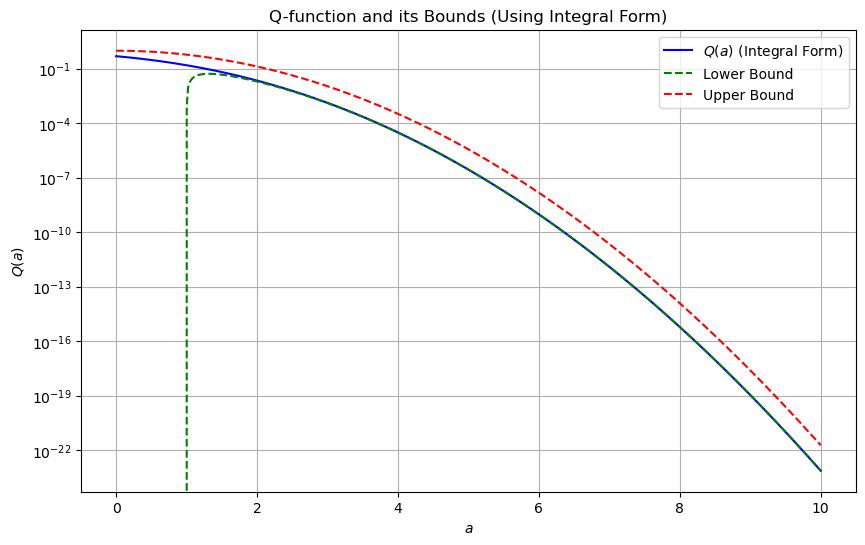

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the Q-function using the integral form
def Q_function_integral(a):
    integrand = lambda w: (1 / np.sqrt(2 * np.pi)) * np.exp(-w**2 / 2)
    result, _ = quad(integrand, a, np.inf)
    return result

# Define the lower bound of Q(a)
def lower_bound_Q(a):
    return (1 / (np.sqrt(2 * np.pi) * a)) * (1 - 1 / a**2) * np.exp(-a**2 / 2)

# Define the upper bound of Q(a)
def upper_bound_Q(a):
    return np.exp(-a**2 / 2)

# Values of a to evaluate
a_values = np.linspace(0, 10, 500)

# Compute Q(a) and its bounds
Q_values = np.array([Q_function_integral(a) for a in a_values])
lower_bounds = lower_bound_Q(a_values)
upper_bounds = upper_bound_Q(a_values)

# Plot Q(a) and its bounds
plt.figure(figsize=(10, 6))
plt.plot(a_values, Q_values, label='$Q(a)$ (Integral Form)', color='blue')
plt.plot(a_values, lower_bounds, '--', label='Lower Bound', color='green')
plt.plot(a_values, upper_bounds, '--', label='Upper Bound', color='red')
plt.xlabel('$a$')
plt.ylabel('$Q(a)$')
plt.yscale('log')
plt.title('Q-function and its Bounds (Using Integral Form)')
plt.legend()
plt.grid(True)
plt.show()
